In [1]:
# import necessary modules
from obspy import UTCDateTime
from obspy import Trace
from obspy import Stream
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy.clients.fdsn import Client
from obspy.core.inventory.inventory import Inventory

import pygmt
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.x")

client_wm = Client("IRIS")


In [2]:
# st = client_wm.get_stations
# st = Stream()
# inv = Inventory()
name = 'CAPN,GHO'
chan = 'BNE'
net  = 'AK'
or_time = '2018-11-30T17:29:29.000Z'
or_time = UTCDateTime(or_time)


In [3]:
st  = client_wm.get_waveforms(net, name, "*", chan, or_time+0, or_time+120)
inv = client_wm.get_stations(network=net, station=name, location="*", channel=chan, starttime=or_time+0, endtime=or_time+120, level='response')
# show the contents of the obspy stream called st
# st
inv

Inventory created at 2023-03-30T23:31:50.093600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2018-11-30...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AK
		Stations (2):
			AK.CAPN (Captain Cook Nikiski, AK, USA)
			AK.GHO (Gloryhole, AK, USA)
		Channels (2):
			AK.CAPN..BNE, AK.GHO..BNE

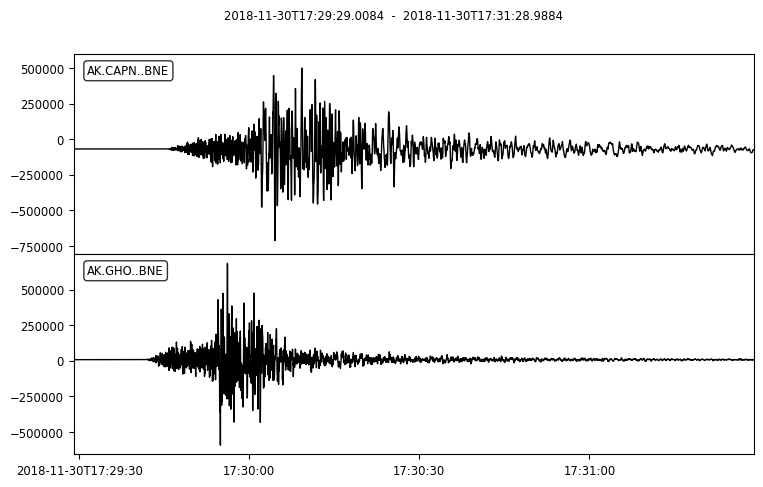

plot


In [4]:
st.plot()
print('plot')

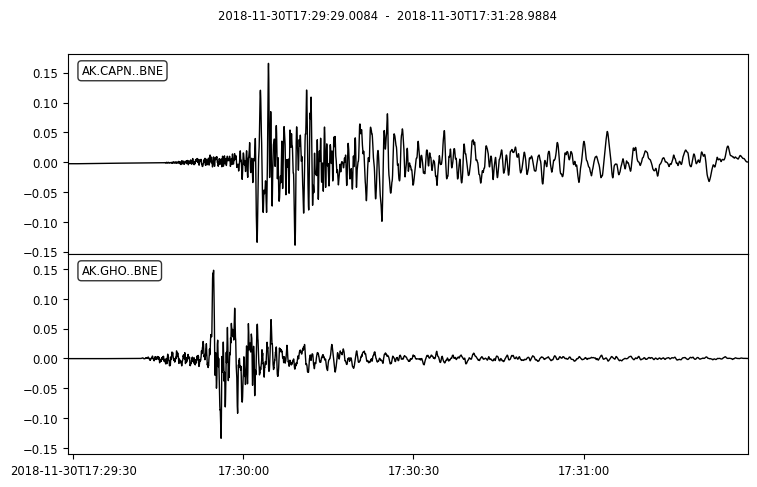

plot


In [5]:
resp_removed = st.copy()
resp_removed.attach_response(inv)
resp_removed = resp_removed.remove_response(output='VEL')
resp_removed.plot()
print('plot')

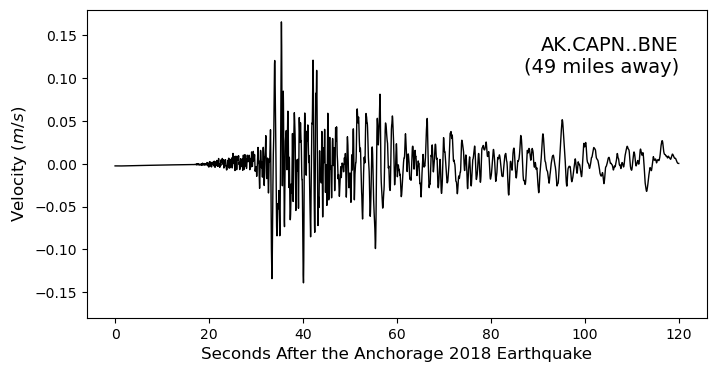

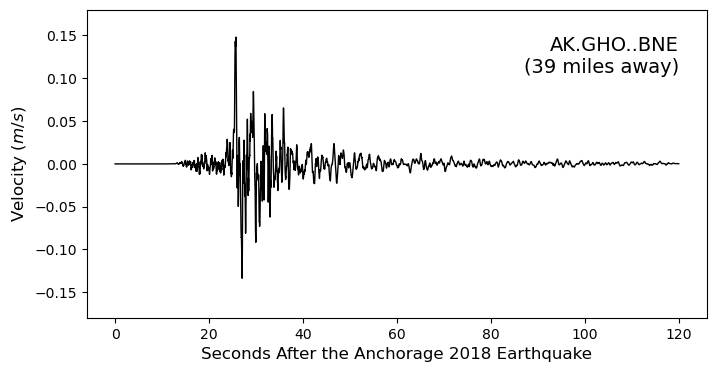

In [6]:
plt.figure(figsize=(8,4))
plt.plot(resp_removed[0].times(), resp_removed[0].data, c='k', lw=1)
plt.text(x=120, y=.15, s='AK.CAPN..BNE\n(49 miles away)', va='top', ha='right', fontsize=14)
plt.ylim(-.18, 0.18)
plt.ylabel(r'Velocity ($m/s$)', fontsize=12)
plt.xlabel(r'Seconds After the Anchorage 2018 Earthquake', fontsize=12)
plt.savefig('CAPN.pdf')

plt.figure(figsize=(8,4))
plt.plot(resp_removed[1].times(), resp_removed[1].data, c='k', lw=1)
plt.text(x=120, y=.15, s='AK.GHO..BNE\n(39 miles away)', va='top', ha='right', fontsize=14)
plt.ylim(-.18, 0.18)
plt.ylabel(r'Velocity ($m/s$)', fontsize=12)
plt.xlabel(r'Seconds After the Anchorage 2018 Earthquake', fontsize=12)
plt.savefig('GHO.pdf')



In [29]:
from pygmt.datasets import load_earth_relief
capn_coords = [inv[0][0].latitude, inv[0][0].longitude]
gho_coords = [inv[0][1].latitude, inv[0][1].longitude]
grid = load_earth_relief(region='Alaska', resolution="15s", registration="pixel")

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N50E170


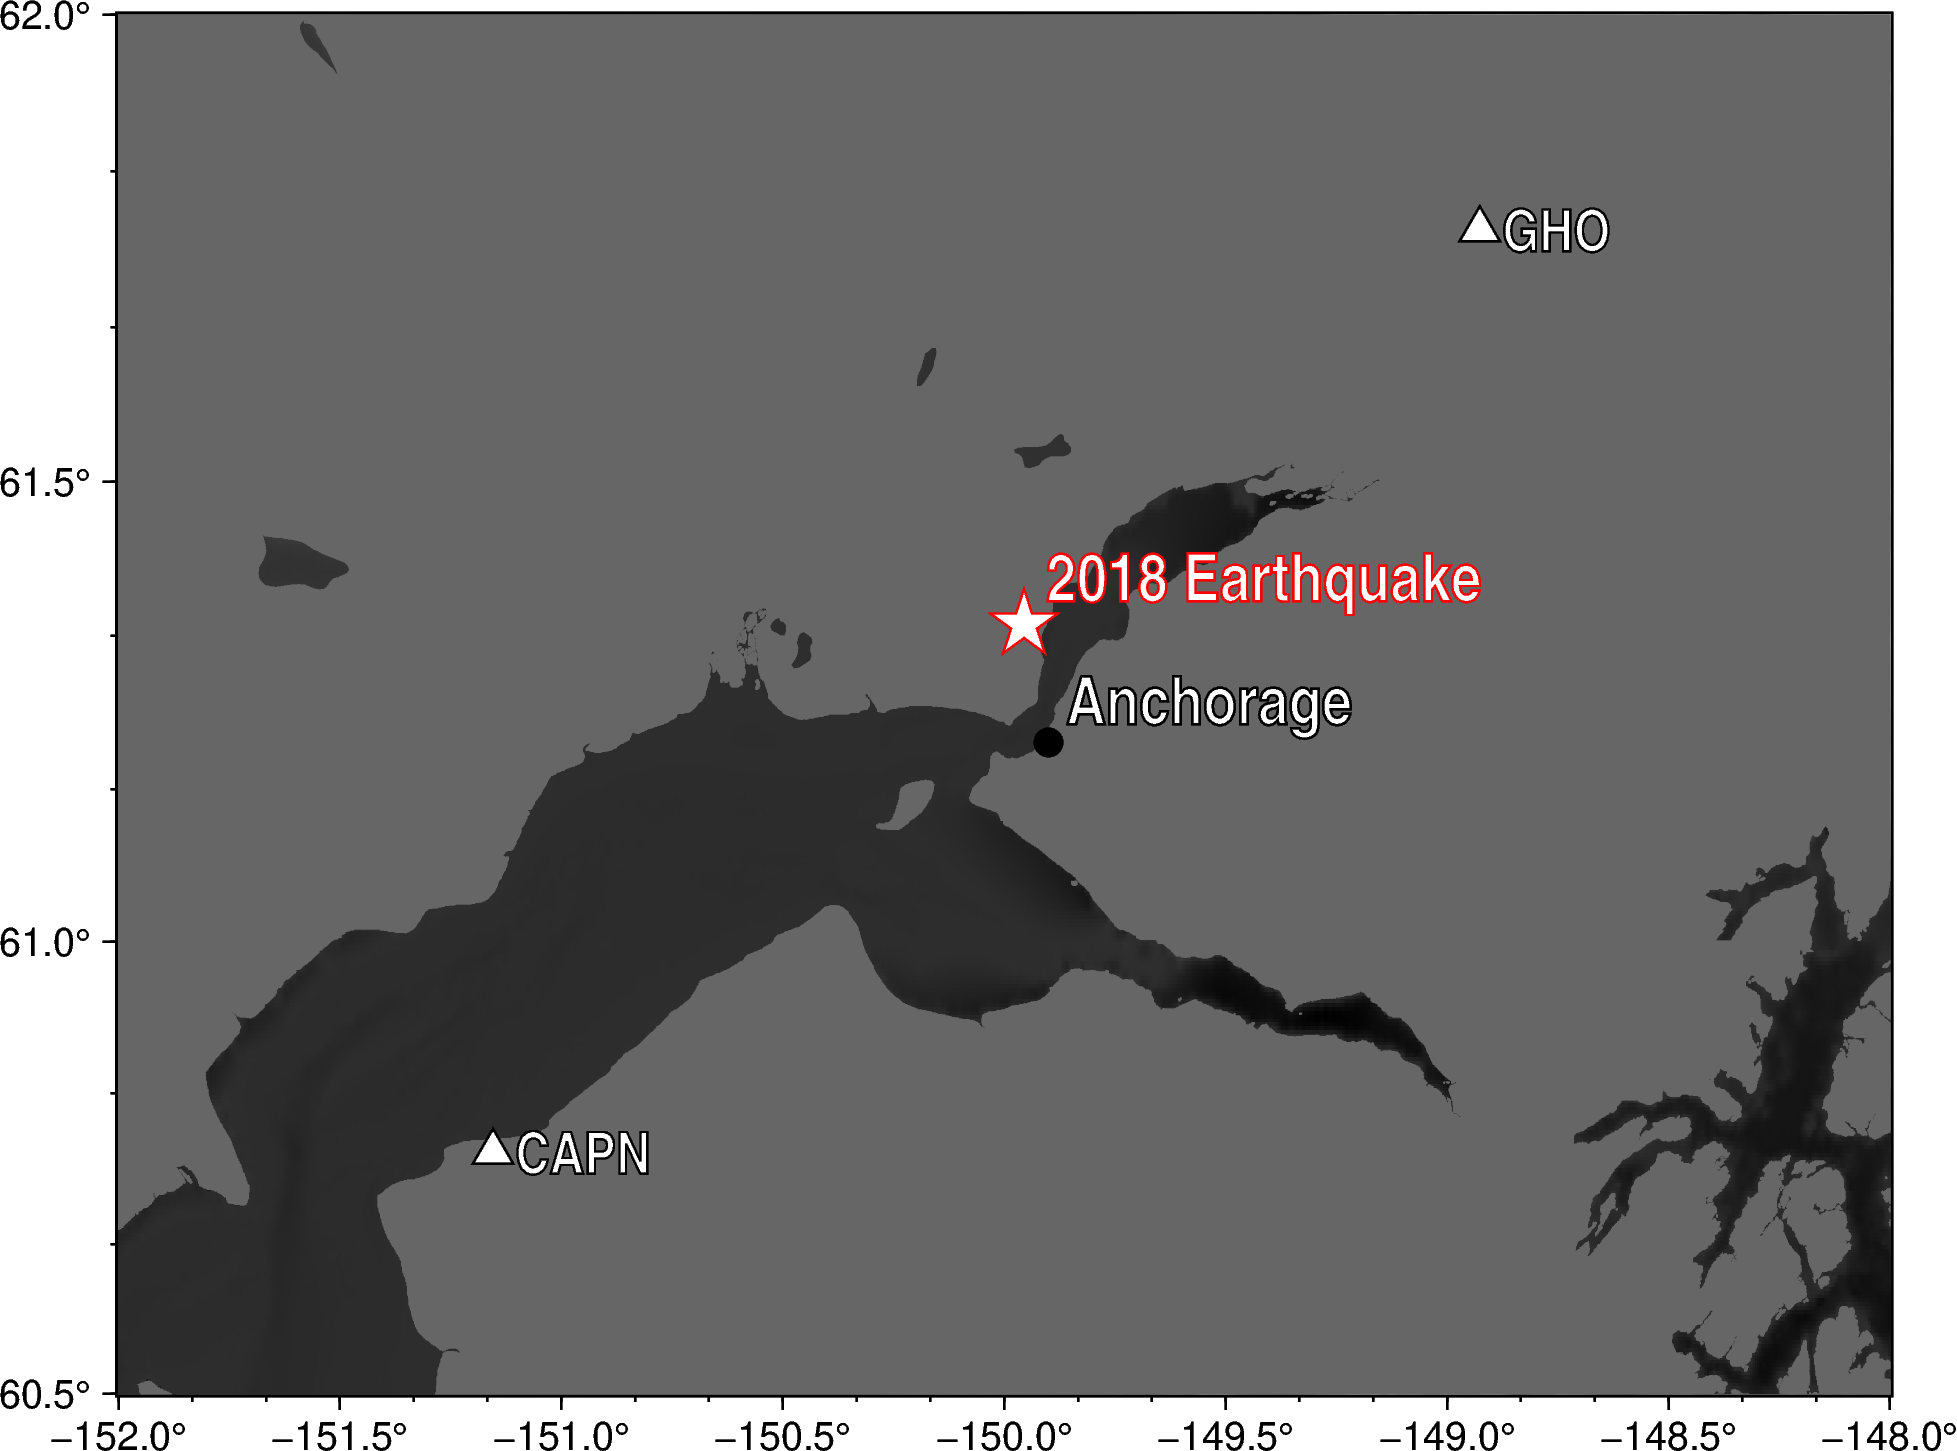

In [40]:

title = r"Alaska Southern Coast Scenarios"
coast_border = "a/0.25p,black"
shorelines = "0.15p,black"
fig = pygmt.Figure()

# fig.basemap(region=[160, 240, 40, 75], projection='M15c', frame=True)
fig.basemap(region='208/60.5/212/62+r', projection='M15c')
fig.coast(shorelines=shorelines, borders=coast_border, water='lightsteelblue1', land='gray84')  # draw coast over datawater='skyblue'
fig.grdimage(grid=grid, cmap="gray")
fig.coast(land="#666666")

fig.plot(
    x=capn_coords[1],
    y=capn_coords[0],
    style='t+0.4c',
    color='white',
    pen='0.5p,black'
)
fig.text(
    x=capn_coords[1] +0.05,
    y=capn_coords[0],
    text='CAPN',
    font='14p,Helvetica-Narrow-Bold,white,=0.4p,black',
    justify='ML'
)

fig.plot(
    x=gho_coords[1],
    y=gho_coords[0],
    style='t+0.4c',
    color='white',
    pen='0.5p,black'
)

fig.text(
    x=gho_coords[1] +0.05,
    y=gho_coords[0],
    text='GHO',
    font='14p,Helvetica-Narrow-Bold,white,=0.4p,black',
    justify='ML'
)

fig.plot(
    x=-149.8997,
    y=61.2176,
    style='c0.25c',
    color='black'
)


corner = 'BL'
adjust = 0.025

fig.text(
    x=-149.8997 + 0.04,
    y=61.2176 +0.02,
    text='Anchorage',
    font='16p,Helvetica-Narrow-Bold,white,=0.5p,black',
    justify=corner
)
fig.plot(
        x=-149.955,
        y=61.346,
        style=f'a.6c',
        color='white',
        pen=f'.4p,red'
    )
fig.text(
    x=-149.955+0.05,
    y=61.346 + adjust,
    text='2018 Earthquake',
    font='16p,Helvetica-Narrow-Bold,white,=0.4p,red',
    justify='BL'
)
fig.show()
fig.savefig('map.pdf')